### Investigating the appropriate scaling for each feature in the target vector ###

In [81]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [82]:
df = pd.read_csv("../data/smiles_and_targets.csv")

# drop outliers
large_indices_A = df[df['A'] > 15].index
print("Outliers in A:", len(large_indices_A))
large_indices_B = df[df['B'] > 10].index
print("Outliers in B:", len(large_indices_B))
large_indices_C = df[df['C'] > 10].index
print("Outliers in C:", len(large_indices_C))
large_indices_temp = np.union1d(large_indices_A, large_indices_B)
large_indices = np.union1d(large_indices_temp, large_indices_C)
print("Total unique outliers:", len(large_indices))

df = df.drop(large_indices)

properties_names = ['A', 'B', 'C', 'mu', 'alfa', 'homo', 'lumo', 'gap', 'R²', 'zpve', 'U0', 'U', 'H', 'G', 'Cv']

targets = df[properties_names]
print(len(df))

Outliers in A: 201
Outliers in B: 21
Outliers in C: 10
Total unique outliers: 211
133585


Characterize the features

In [83]:
targets.describe()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv
count,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000,133585.000000
mean,3.395280,1.396704,1.117681,2.706414,75.218757,-0.239936,0.011189,0.251124,1189.790104,0.148640,-411.755925,-411.747450,-411.746506,-411.789342,31.617655
std,1.278792,0.456613,0.327118,1.530020,8.103631,0.022100,0.046900,0.047476,278.396149,0.033191,39.592080,39.591872,39.591872,39.592572,4.039585
min,0.000000,0.337120,0.331180,0.000000,15.930000,-0.428600,-0.175000,0.024600,242.930800,0.015951,-714.568050,-714.560200,-714.559200,-714.602100,10.398000
25%,2.553330,1.092090,0.910710,1.589500,70.400000,-0.252500,-0.023700,0.216300,1018.651000,0.125354,-437.916600,-437.908600,-437.907650,-437.950650,28.954000
50%,3.088040,1.370160,1.078610,2.500400,75.510000,-0.241000,0.012100,0.249500,1147.639200,0.148369,-417.903560,-417.896420,-417.895480,-417.936300,31.564000
75%,3.828780,1.653750,1.279200,3.635800,80.520000,-0.228600,0.049300,0.288200,1308.800500,0.171174,-387.052200,-387.042850,-387.041900,-387.086100,34.282000
max,14.974290,9.935090,6.462470,29.556400,196.620000,-0.101700,0.193500,0.622100,3374.753200,0.273944,-153.459840,-153.455440,-153.454500,-153.482620,46.969000


C:\Users\Jesper\AppData\Local\Temp\ipykernel_13308\474093122.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = targets.hist(bins=25, ax=ax)


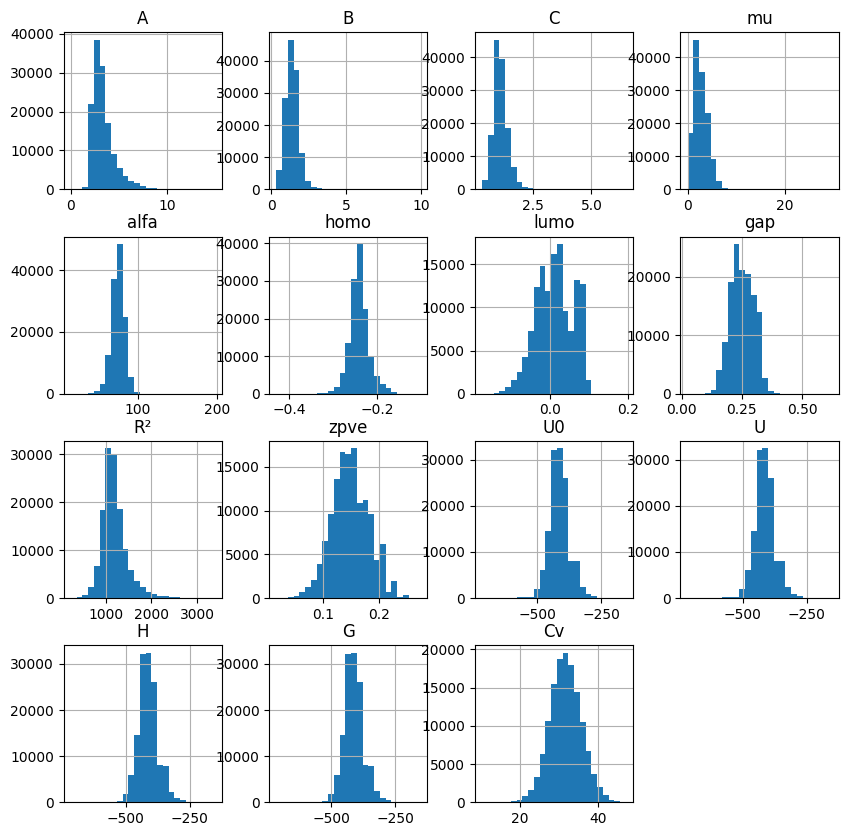

In [84]:
# plot histograms of values in each column
ax = plt.figure(figsize=(10,10))
hist = targets.hist(bins=25, ax=ax)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

target_values = targets.values
print(target_values.shape)

target_values = scaler.fit_transform(target_values)

targets_scaled = targets.copy()
for idx, col_name in enumerate(properties_names):
    targets_scaled[col_name] = target_values[:,idx] 

print("First rows before scaling:")
print(targets.values[0:2,:])
print("First rows after scaling:")
print(targets_scaled.values[0:2,:])

(133585, 15)
First rows before scaling:
[[ 1.0121930e+01  8.4901100e+00  4.8961500e+00  2.7362000e+00
   3.5530000e+01 -2.4310000e-01 -8.7000000e-03  2.3440000e-01
   2.9243670e+02  8.3382000e-02 -1.9308833e+02 -1.9308296e+02
  -1.9308203e+02 -1.9311647e+02  1.6893000e+01]
 [ 1.0788860e+01  9.2750900e+00  5.1497700e+00  3.6367000e+00
   3.1830000e+01 -2.4360000e-01  3.4700000e-02  2.7830000e-01
   2.6761480e+02  7.3190000e-02 -2.0915930e+02 -2.0915402e+02
  -2.0915308e+02 -2.0918747e+02  1.6561000e+01]]
First rows after scaling:
[[ 5.26017807 15.5349008  11.55081382  0.01946793 -4.89766973 -0.14318022
  -0.42406443 -0.35227032 -3.22330882 -1.96614481  5.52303426  5.52298489
   5.52298453  5.52309884 -3.64510486]
 [ 5.78171112 17.25404478 12.3261325   0.60802438 -5.35425692 -0.16580477
   0.50131238  0.57241877 -3.31246951 -2.27321889  5.11711898  5.1170652
   5.11706509  5.11718786 -3.72729183]]


C:\Users\Jesper\AppData\Local\Temp\ipykernel_13308\1030398415.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = targets_scaled.hist(bins=25, ax=ax)


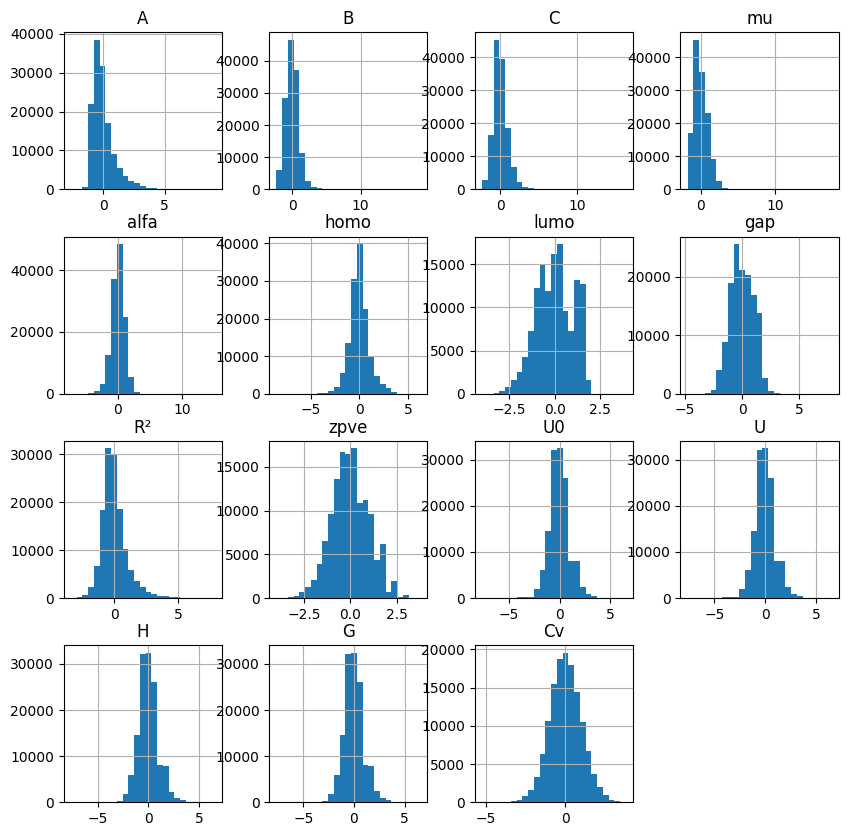

In [86]:
ax = plt.figure(figsize=(10,10))
hist = targets_scaled.hist(bins=25, ax=ax)